## Example 1: Chimera

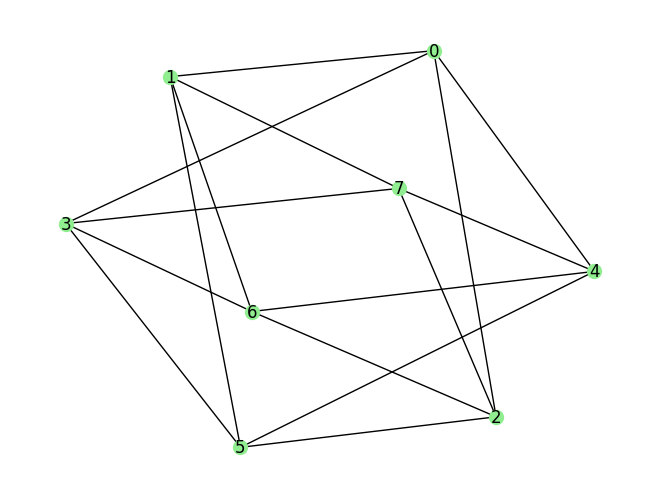

In [ ]:
import dwave_networkx as dnx
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from dwave.experimental.automorphism import *

G = dnx.chimera_graph(1)

num_delete = 0
to_remove = random.sample(range(0, G.number_of_nodes()), num_delete)

for node in to_remove:
    G.remove_node(node)

# relabel nodes to be continuous
label_mapping={list(G.nodes)[j]:j for j in range(G.number_of_nodes())}
G=nx.relabel_nodes(G, label_mapping) 

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=100)

plt.show()

In [8]:
# Get the group vector in the Schreier-Sims reprsentation
G_vector_chimera = schreier_rep(G, num_samples=3)

In [12]:
#print the elements of the group vector in cycle notation (not including identity)
for i, U in enumerate(G_vector_chimera[1]):
    print(f'\nU_{i}:')
    for h in U:
        print(ArrayToCycle(h))


U_0:
(0,7,6)(1,4)(2)(3)(5)
(0,1,7,4,6,2)(3,5)
(0,2)(1,7,4,6)(3,5)
(0,3,5,4,6,1,7,2)
(0,4,7,2)(1,6)(3,5)
(0,5,7,6)(1)(2)(3)(4)
(0,6)(1,2,4)(3)(5)(7)

U_1:
(0)(1,4,2)(3)(5)(6,7)
(0)(1,2)(3)(4)(5)(6)(7)
(0)(1,3,4,2)(5)(6)(7)

U_2:
(0)(1)(2,4)(3)(5)(6,7)
(0)(1)(2,3,4)(5)(6)(7)

U_3:
(0)(1)(2)(3,4)(5)(6,7)

U_4:

U_5:
(0)(1)(2)(3)(4)(5,6)(7)
(0)(1)(2)(3)(4)(5,7)(6)

U_6:
(0)(1)(2)(3)(4)(5)(6,7)

U_7:


In [11]:
print('Number of automorphisms: ', int(np.prod([len(x) + 1 for x in G_vector_chimera[1]])))

Number of automorphisms:  1152


## Example 2: Zephyr-12 Lattice w/ 96% yield

In [63]:
G_z = dnx.zephyr_graph(12)

num_delete = int(0.04 * G_z.number_of_nodes())
to_remove = random.sample(range(0, G_z.number_of_nodes()), num_delete)

for node in to_remove:
    G_z.remove_node(node)

# relabel nodes to be continuous
label_mapping = {list(G_z.nodes)[j]:j for j in range(G_z.number_of_nodes())}
G_z = nx.relabel_nodes(G_z, label_mapping) 

In [ ]:
G_vector_zephyr = schreier_rep(G_z, num_samples=3) # takes about 5 mins

In [67]:
print('Number of automorphisms: ', int(np.prod([len(x) + 1 for x in G_vector_zephyr[1]], dtype=object)))

Number of automorphisms:  380420285792256
